In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import requests
import json
import scipy.stats as st

# import and subset mental health data

In [3]:
df=pd.read_csv("data_resources/2020IndicatorsofDepression.csv")
df

,Indicator,Group,State,Subgroup,Week,Week Label,Value,Low CI,High CI,Confidence Interval,Quartile range
0,Symptoms of Depressive Disorder,National Estimate,United States,United States,1,Apr 23 - May 5,23.5,22.7,24.3,22.7 - 24.3,NaN
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1,Apr 23 - May 5,32.7,30.2,35.2,30.2 - 35.2,NaN
2,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1,Apr 23 - May 5,25.7,24.1,27.3,24.1 - 27.3,NaN
3,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,1,Apr 23 - May 5,24.8,23.3,26.2,23.3 - 26.2,NaN
4,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,1,Apr 23 - May 5,23.2,21.5,25.0,21.5 - 25.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2515,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Virginia,Virginia,12,July 16 - July 21,38.3,34.0,42.7,34.0 - 42.7,37.2-40.5
2516,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Washington,Washington,12,July 16 - July 21,43.8,39.3,48.5,39.3 - 48.5,43.6-50.2
2517,Symptoms of Anxiety Disorder or Depressive Dis...,By State,West Virginia,West Virginia,12,July 16 - July 21,37.0,31.4,42.8,31.4 - 42.8,31.8-37.1
2518,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Wisconsin,Wisconsin,12,July 16 - July 21,33.3,28.9,37.9,28.9 - 37.9,31.8-37.1


In [4]:
df.Group.unique()

array(['National Estimate', 'By Age', 'By Gender',
       'By Race/Hispanic ethnicity', 'By Education', 'By State'],
      dtype=object)

The r-squared is: 0.07671689417201501


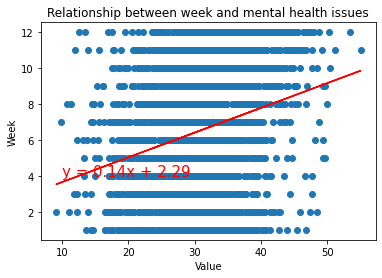

There is a strong positive correlation mental health issues and increase in week


In [5]:
st.linregress(df["Value"],df["Week"])

x_values = df["Value"]
y_values = df["Week"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,4),fontsize=15,color="red")
plt.xlabel('Value')
plt.ylabel('Week')
plt.title("Relationship between week and mental health issues")
plt.show()
#plt.savefig("../Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
%matplotlib inline
print(f"There is a strong positive correlation mental health issues and increase in week")

In [6]:
# us_state_abbrev["Georgia"] # "GA"
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

In [7]:
# Convert string column to numeric
df["Indicator_Num"]=df["Indicator"].mask(df["Indicator"]=="Symptoms of Depressive Disorder",1) 
df["Indicator_Num"]=df["Indicator_Num"].mask(df["Indicator_Num"]=="Symptoms of Anxiety Disorder",2)
df["Indicator_Num"]=df["Indicator_Num"].mask(df["Indicator_Num"]=="Symptoms of Anxiety Disorder or Depressive Disorder",3)
df["Indicator_Num"].unique()

array([1, 2, 3], dtype=object)

In [8]:
df.head()

,Indicator,Group,State,Subgroup,Week,Week Label,Value,Low CI,High CI,Confidence Interval,Quartile range,Indicator_Num
0,Symptoms of Depressive Disorder,National Estimate,United States,United States,1,Apr 23 - May 5,23.5,22.7,24.3,22.7 - 24.3,NaN,1
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1,Apr 23 - May 5,32.7,30.2,35.2,30.2 - 35.2,NaN,1
2,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1,Apr 23 - May 5,25.7,24.1,27.3,24.1 - 27.3,NaN,1
3,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,1,Apr 23 - May 5,24.8,23.3,26.2,23.3 - 26.2,NaN,1
4,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,1,Apr 23 - May 5,23.2,21.5,25.0,21.5 - 25.0,NaN,1


In [9]:
df.Subgroup.unique()

array(['United States', '18 - 29 years', '30 - 39 years', '40 - 49 years',
       '50 - 59 years', '60 - 69 years', '70 - 79 years',
       '80 years and above', 'Male', 'Female', 'Hispanic or Latino',
       'Non-Hispanic white, single race',
       'Non-Hispanic black, single race',
       'Non-Hispanic Asian, single race',
       'Non-Hispanic, other races and multiple races',
       'Less than a high school diploma', 'High school diploma or GED',
       "Some college/Associate's degree", "Bachelor's degree or higher",
       'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina

In [10]:
ages_df = df.loc[df["Subgroup"] == '18 - 29 years']

In [11]:
ages_df = df.loc[df["Subgroup"] == '18 - 29 years']

In [12]:
ages_df2=ages_df.append(df.loc[df["Subgroup"] == '30 - 39 years'])
ages_df2=ages_df.append(df.loc[df["Subgroup"] == '40 - 49 years'])
ages_df2=ages_df.append(df.loc[df["Subgroup"] == '50 - 59 years'])
ages_df2=ages_df.append(df.loc[df["Subgroup"] == '60 - 69 years'])
ages_df2=ages_df.append(df.loc[df["Subgroup"] == '70 - 79 years'])
ages_df2=ages_df.append(df.loc[df["Subgroup"] == '80 years and above'])

In [13]:
group_df=df[["Group"]]
df.Group.unique()

array(['National Estimate', 'By Age', 'By Gender',
       'By Race/Hispanic ethnicity', 'By Education', 'By State'],
      dtype=object)

# Note
There are too many values to compare in the three indicators. Separating by Depressive Disorder.

In [19]:
df.Indicator.unique()

array(['Symptoms of Depressive Disorder', 'Symptoms of Anxiety Disorder',
       'Symptoms of Anxiety Disorder or Depressive Disorder'],
      dtype=object)

In [20]:
age_df_depressive = df.loc[(df['Group']=="By Age") & (df['Indicator'] == 'Symptoms of Anxiety Disorder or Depressive Disorder')]
print(len(age_df_depressive))
age_df_depressive.head()

84


,Indicator,Group,State,Subgroup,Week,Week Label,Value,Low CI,High CI,Confidence Interval,Quartile range,Indicator_Num
141,Symptoms of Anxiety Disorder or Depressive Dis...,By Age,United States,18 - 29 years,1,Apr 23 - May 5,46.8,44.3,49.3,44.3 - 49.3,NaN,3
142,Symptoms of Anxiety Disorder or Depressive Dis...,By Age,United States,30 - 39 years,1,Apr 23 - May 5,39.6,37.7,41.5,37.7 - 41.5,NaN,3
143,Symptoms of Anxiety Disorder or Depressive Dis...,By Age,United States,40 - 49 years,1,Apr 23 - May 5,38.9,37.2,40.7,37.2 - 40.7,NaN,3
144,Symptoms of Anxiety Disorder or Depressive Dis...,By Age,United States,50 - 59 years,1,Apr 23 - May 5,35.8,34.0,37.7,34.0 - 37.7,NaN,3
145,Symptoms of Anxiety Disorder or Depressive Dis...,By Age,United States,60 - 69 years,1,Apr 23 - May 5,28.9,27.6,30.3,27.6 - 30.3,NaN,3


In [21]:
age_df_depressive.tail()

,Indicator,Group,State,Subgroup,Week,Week Label,Value,Low CI,High CI,Confidence Interval,Quartile range,Indicator_Num
2453,Symptoms of Anxiety Disorder or Depressive Dis...,By Age,United States,40 - 49 years,12,July 16 - July 21,44.5,42.4,46.5,42.4 - 46.5,NaN,3
2454,Symptoms of Anxiety Disorder or Depressive Dis...,By Age,United States,50 - 59 years,12,July 16 - July 21,40.0,38.2,41.9,38.2 - 41.9,NaN,3
2455,Symptoms of Anxiety Disorder or Depressive Dis...,By Age,United States,60 - 69 years,12,July 16 - July 21,32.1,30.3,34.0,30.3 - 34.0,NaN,3
2456,Symptoms of Anxiety Disorder or Depressive Dis...,By Age,United States,70 - 79 years,12,July 16 - July 21,24.3,21.9,26.8,21.9 - 26.8,NaN,3
2457,Symptoms of Anxiety Disorder or Depressive Dis...,By Age,United States,80 years and above,12,July 16 - July 21,17.5,14.3,21.0,14.3 - 21.0,NaN,3


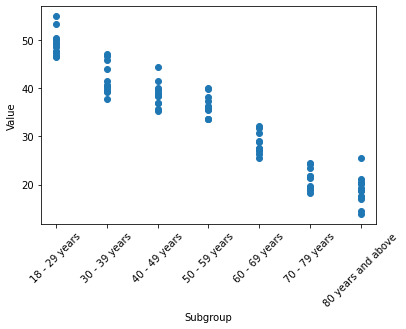

In [22]:
plt.scatter(age_df_depressive.iloc[:,3], age_df_depressive.iloc[:,6])
plt.xlabel("Subgroup")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.show()


In [64]:
age_bar

,Value,Subgroup
1,32.7,18 - 29 years
2,25.7,30 - 39 years
3,24.8,40 - 49 years
4,23.2,50 - 59 years
5,18.4,60 - 69 years
...,...,...
2453,44.5,40 - 49 years
2454,40.0,50 - 59 years
2455,32.1,60 - 69 years
2456,24.3,70 - 79 years


In [ ]:
plot.boxplot((i))
plot.boxplot((sequence1, sequence2, sequence3))
plot.show()

In [11]:
state_df = df.loc[(df['Group']=="By State") & (df['Week'] == 12)]
print(len(state_df))
state_df.head()

153


,Indicator,Group,State,Subgroup,Week,Week Label,Value,Low CI,High CI,Confidence Interval,Quartile range,Indicator_Num
2329,Symptoms of Depressive Disorder,By State,Alabama,Alabama,12,July 16 - July 21,32.7,27.7,38.0,27.7 - 38.0,32.3-38.6,1
2330,Symptoms of Depressive Disorder,By State,Alaska,Alaska,12,July 16 - July 21,27.4,22.9,32.2,22.9 - 32.2,26.0-29.3,1
2331,Symptoms of Depressive Disorder,By State,Arizona,Arizona,12,July 16 - July 21,34.3,29.9,38.9,29.9 - 38.9,32.3-38.6,1
2332,Symptoms of Depressive Disorder,By State,Arkansas,Arkansas,12,July 16 - July 21,33.7,29.8,37.8,29.8 - 37.8,32.3-38.6,1
2333,Symptoms of Depressive Disorder,By State,California,California,12,July 16 - July 21,31.2,28.2,34.3,28.2 - 34.3,29.4-32.2,1


In [12]:
new_col = []
for state in state_df["State"]:
    new_col.append(us_state_abbrev[state])
state_df["State"] = new_col
state_df.head()

/Users/Jen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Indicator,Group,State,Subgroup,Week,Week Label,Value,Low CI,High CI,Confidence Interval,Quartile range,Indicator_Num
2329,Symptoms of Depressive Disorder,By State,AL,Alabama,12,July 16 - July 21,32.7,27.7,38.0,27.7 - 38.0,32.3-38.6,1
2330,Symptoms of Depressive Disorder,By State,AK,Alaska,12,July 16 - July 21,27.4,22.9,32.2,22.9 - 32.2,26.0-29.3,1
2331,Symptoms of Depressive Disorder,By State,AZ,Arizona,12,July 16 - July 21,34.3,29.9,38.9,29.9 - 38.9,32.3-38.6,1
2332,Symptoms of Depressive Disorder,By State,AR,Arkansas,12,July 16 - July 21,33.7,29.8,37.8,29.8 - 37.8,32.3-38.6,1
2333,Symptoms of Depressive Disorder,By State,CA,California,12,July 16 - July 21,31.2,28.2,34.3,28.2 - 34.3,29.4-32.2,1


# import and subset covid data

In [13]:
covid_df=pd.read_csv("data_resources/Covid_Data.csv")
covid_df
latest_covid_df = covid_df.loc[(covid_df["date"]>=20200716) & (covid_df["date"]<=20200721)]
print(len(latest_covid_df))
latest_covid_df.head()

336


,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
896,20200721,AK,2525.0,176101.0,NaN,32.0,NaN,NaN,NaN,1.0,...,178626,0,0,ee5450055a413173129ad034f9098d3f87412492,0,0,0,0,0,NaN
897,20200721,AL,70358.0,530023.0,NaN,1547.0,8538.0,NaN,1009.0,NaN,...,600381,12,170,b2647427b333f419f8b752ae1c13f78474beca6a,0,0,0,0,0,NaN
898,20200721,AR,34655.0,404980.0,NaN,488.0,2257.0,NaN,NaN,111.0,...,439635,17,55,b77efbc4e760c38a840401a8d10f162556ecd753,0,0,0,0,0,NaN
899,20200721,AS,0.0,1037.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1037,0,0,0751b91aec0bbed662c9bf6c56ba3fb8cadfa0d1,0,0,0,0,0,NaN
900,20200721,AZ,148683.0,658983.0,NaN,3041.0,6894.0,865.0,NaN,608.0,...,807666,134,196,17596c616e20a48a976b56c45c4a94b1480d5f0c,0,0,0,0,0,NaN


# merge state_df and latest_covid_df

In [14]:
print(state_df.columns)
print(latest_covid_df.columns)

Index(['Indicator', 'Group', 'State', 'Subgroup', 'Week', 'Week Label',
       'Value', 'Low CI', 'High CI', 'Confidence Interval', 'Quartile range',
       'Indicator_Num'],
      dtype='object')
Index(['date', 'state', 'positive', 'negative', 'pending',
       'hospitalizedCurrently', 'hospitalizedCumulative', 'inIcuCurrently',
       'inIcuCumulative', 'onVentilatorCurrently', 'onVentilatorCumulative',
       'recovered', 'dataQualityGrade', 'lastUpdateEt', 'dateModified',
       'checkTimeEt', 'death', 'hospitalized', 'dateChecked',
       'totalTestsViral', 'positiveTestsViral', 'negativeTestsViral',
       'positiveCasesViral', 'deathConfirmed', 'deathProbable', 'fips',
       'positiveIncrease', 'negativeIncrease', 'total', 'totalTestResults',
       'totalTestResultsIncrease', 'posNeg', 'deathIncrease',
       'hospitalizedIncrease', 'hash', 'commercialScore',
       'negativeRegularScore', 'negativeScore', 'positiveScore', 'score',
       'grade'],
      dtype='object')


In [15]:
renamed_state_df=state_df.rename(columns={"State":"state"},inplace= False)
renamed_state_df.head()

,Indicator,Group,state,Subgroup,Week,Week Label,Value,Low CI,High CI,Confidence Interval,Quartile range,Indicator_Num
2329,Symptoms of Depressive Disorder,By State,AL,Alabama,12,July 16 - July 21,32.7,27.7,38.0,27.7 - 38.0,32.3-38.6,1
2330,Symptoms of Depressive Disorder,By State,AK,Alaska,12,July 16 - July 21,27.4,22.9,32.2,22.9 - 32.2,26.0-29.3,1
2331,Symptoms of Depressive Disorder,By State,AZ,Arizona,12,July 16 - July 21,34.3,29.9,38.9,29.9 - 38.9,32.3-38.6,1
2332,Symptoms of Depressive Disorder,By State,AR,Arkansas,12,July 16 - July 21,33.7,29.8,37.8,29.8 - 37.8,32.3-38.6,1
2333,Symptoms of Depressive Disorder,By State,CA,California,12,July 16 - July 21,31.2,28.2,34.3,28.2 - 34.3,29.4-32.2,1


In [16]:
state_df
latest_covid_df
merged_data=pd.merge(renamed_state_df[["Indicator","Group","state","Week Label","Value"]], 
                     latest_covid_df[["date","state","positive"]],
                     how ="left",
                     on=['state'])
merged_data

,Indicator,Group,state,Week Label,Value,date,positive
0,Symptoms of Depressive Disorder,By State,AL,July 16 - July 21,32.7,20200721,70358.0
1,Symptoms of Depressive Disorder,By State,AL,July 16 - July 21,32.7,20200720,68891.0
2,Symptoms of Depressive Disorder,By State,AL,July 16 - July 21,32.7,20200719,67011.0
3,Symptoms of Depressive Disorder,By State,AL,July 16 - July 21,32.7,20200718,65234.0
4,Symptoms of Depressive Disorder,By State,AL,July 16 - July 21,32.7,20200717,63091.0
...,...,...,...,...,...,...,...
913,Symptoms of Anxiety Disorder or Depressive Dis...,By State,WY,July 16 - July 21,41.3,20200720,2187.0
914,Symptoms of Anxiety Disorder or Depressive Dis...,By State,WY,July 16 - July 21,41.3,20200719,2126.0
915,Symptoms of Anxiety Disorder or Depressive Dis...,By State,WY,July 16 - July 21,41.3,20200718,2108.0
916,Symptoms of Anxiety Disorder or Depressive Dis...,By State,WY,July 16 - July 21,41.3,20200717,2069.0


In [17]:
depressive_df=merged_data.loc[merged_data["Indicator"]=="Symptoms of Depressive Disorder"]
depressive_df.head()

,Indicator,Group,state,Week Label,Value,date,positive
0,Symptoms of Depressive Disorder,By State,AL,July 16 - July 21,32.7,20200721,70358.0
1,Symptoms of Depressive Disorder,By State,AL,July 16 - July 21,32.7,20200720,68891.0
2,Symptoms of Depressive Disorder,By State,AL,July 16 - July 21,32.7,20200719,67011.0
3,Symptoms of Depressive Disorder,By State,AL,July 16 - July 21,32.7,20200718,65234.0
4,Symptoms of Depressive Disorder,By State,AL,July 16 - July 21,32.7,20200717,63091.0


In [18]:
anxiety_df=merged_data.loc[merged_data["Indicator"]=="Symptoms of Anxiety Disorder"]
anxiety_df.head()

,Indicator,Group,state,Week Label,Value,date,positive
306,Symptoms of Anxiety Disorder,By State,AL,July 16 - July 21,39.9,20200721,70358.0
307,Symptoms of Anxiety Disorder,By State,AL,July 16 - July 21,39.9,20200720,68891.0
308,Symptoms of Anxiety Disorder,By State,AL,July 16 - July 21,39.9,20200719,67011.0
309,Symptoms of Anxiety Disorder,By State,AL,July 16 - July 21,39.9,20200718,65234.0
310,Symptoms of Anxiety Disorder,By State,AL,July 16 - July 21,39.9,20200717,63091.0


In [19]:
dep_anx_df=merged_data.loc[merged_data["Indicator"]=="Symptoms of Anxiety Disorder or Depressive Disorder"]
dep_anx_df.head()

,Indicator,Group,state,Week Label,Value,date,positive
612,Symptoms of Anxiety Disorder or Depressive Dis...,By State,AL,July 16 - July 21,43.3,20200721,70358.0
613,Symptoms of Anxiety Disorder or Depressive Dis...,By State,AL,July 16 - July 21,43.3,20200720,68891.0
614,Symptoms of Anxiety Disorder or Depressive Dis...,By State,AL,July 16 - July 21,43.3,20200719,67011.0
615,Symptoms of Anxiety Disorder or Depressive Dis...,By State,AL,July 16 - July 21,43.3,20200718,65234.0
616,Symptoms of Anxiety Disorder or Depressive Dis...,By State,AL,July 16 - July 21,43.3,20200717,63091.0


The r-squared is: 0.00989110109492202


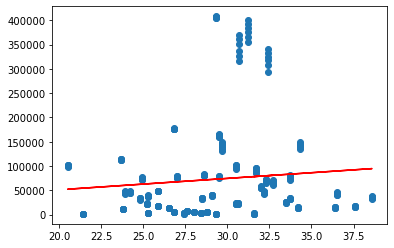

There is a weak positive correlation between depressive people and covid_cases in the state


In [20]:
st.linregress(depressive_df["Value"],depressive_df["positive"])

x_values = depressive_df["Value"]
y_values = depressive_df["positive"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(10,40),fontsize=15,color="red")
# plt.xlabel('Latitude')
# plt.ylabel('Max Temp')
# plt.title("Northern Hemisphere- Max Temp vs. Latitude Linear Regression(08/09/2020)")
plt.show()
#plt.savefig("../Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
#%matplotlib inline
print(f"There is a weak positive correlation between depressive people and covid_cases in the state")

The r-squared is: 0.021418265646657893


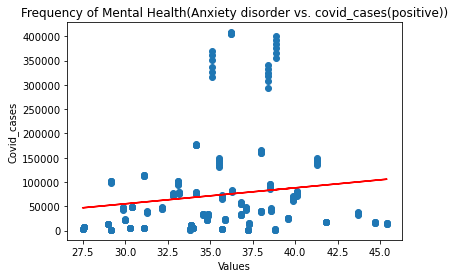

There is a weak positive correlation between anxious people and covid_cases in the state


In [21]:
st.linregress(anxiety_df["Value"],anxiety_df["positive"])

x_values = anxiety_df["Value"]
y_values = anxiety_df["positive"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(10,40),fontsize=15,color="red")
plt.xlabel('Values')
plt.ylabel('Covid_cases')
plt.title("Frequency of Mental Health(Anxiety disorder vs. covid_cases(positive))")
plt.show()
#plt.savefig("../Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
#%matplotlib inline
print(f"There is a weak positive correlation between anxious people and covid_cases in the state")

The r-squared is: 0.023045784508889052


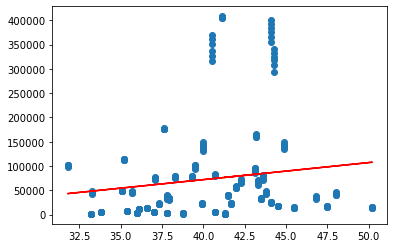

There is a weak positive correlation between people suffering from either mental health generally and covid_cases in the state


In [22]:
st.linregress(dep_anx_df["Value"],dep_anx_df["positive"])

x_values = dep_anx_df["Value"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(10,40),fontsize=15,color="red")
# plt.xlabel('Latitude')
# plt.ylabel('Max Temp')
# plt.title("Northern Hemisphere- Max Temp vs. Latitude Linear Regression(08/09/2020)")
plt.show()
#plt.savefig("../Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
#%matplotlib inline
print(f"There is a weak positive correlation between people suffering from either mental health generally and covid_cases in the state")

